<a href="https://colab.research.google.com/github/Betson1/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%D1%87%D0%B0%D1%81%D1%82%D1%8C_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

auction = pd.read_csv('/content/drive/MyDrive/auction_verification.csv')

display(auction)

Mounted at /content/drive/


,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


Функция для определения типа данных

In [ ]:
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

# Пример использования функции для определения типа столбца
column_type = utils_recognize_type(auction, 'property.price')
print(f'The column "property.price" is recognized as: {column_type}')

The column "property.price" is recognized as: num


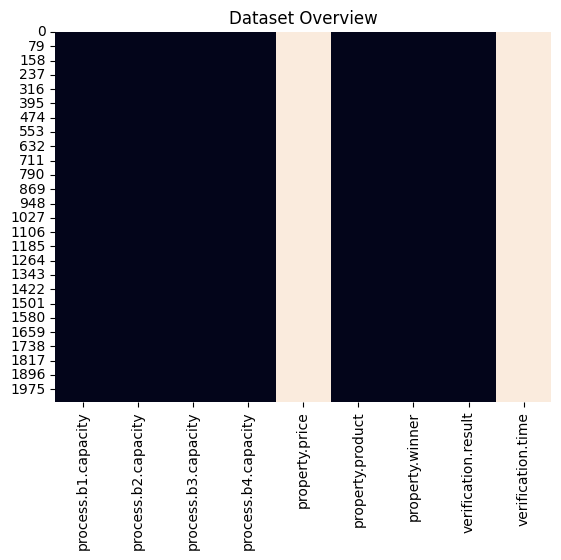

 Categorical   Numeric   NaN 


In [ ]:
# Создаем словарь dic_cols, где ключи - названия фич, а значения - тип столбца (cat или num)
dic_cols = {col: utils_recognize_type(auction, col, max_cat=20) for col in auction.columns}

# Генерируем heatmap, где отмечены пропущенные значения
heatmap = auction.isnull()

# Присваиваем числовые значения в зависимости от типа столбца и наличия пропущенных данных
for k, v in dic_cols.items():
    if v == "num":
        heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
    else:
        heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)

# Строим тепловую карту
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()

# Печать легенды
print("\033[1;37;40m Categorical ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")


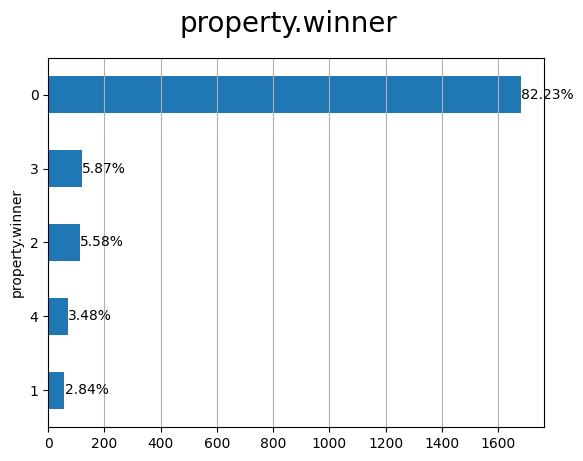

In [ ]:
# Название столбца, по которому будем группировать
y = "property.winner"  # Замените на нужный столбец, например, "property.winner" или другой

# Считаем количество объектов с одинаковыми значениями в столбце y, сортируем и строим график
ax = auction[y].value_counts().sort_values().plot(kind="barh")

# Формируем надписи для графика с процентами
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_width() + .3, i.get_y() + .20,
            str(round((i.get_width() / total) * 100, 2)) + '%',
            fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(y, fontsize=20)

# Отрисовка графика
plt.show()


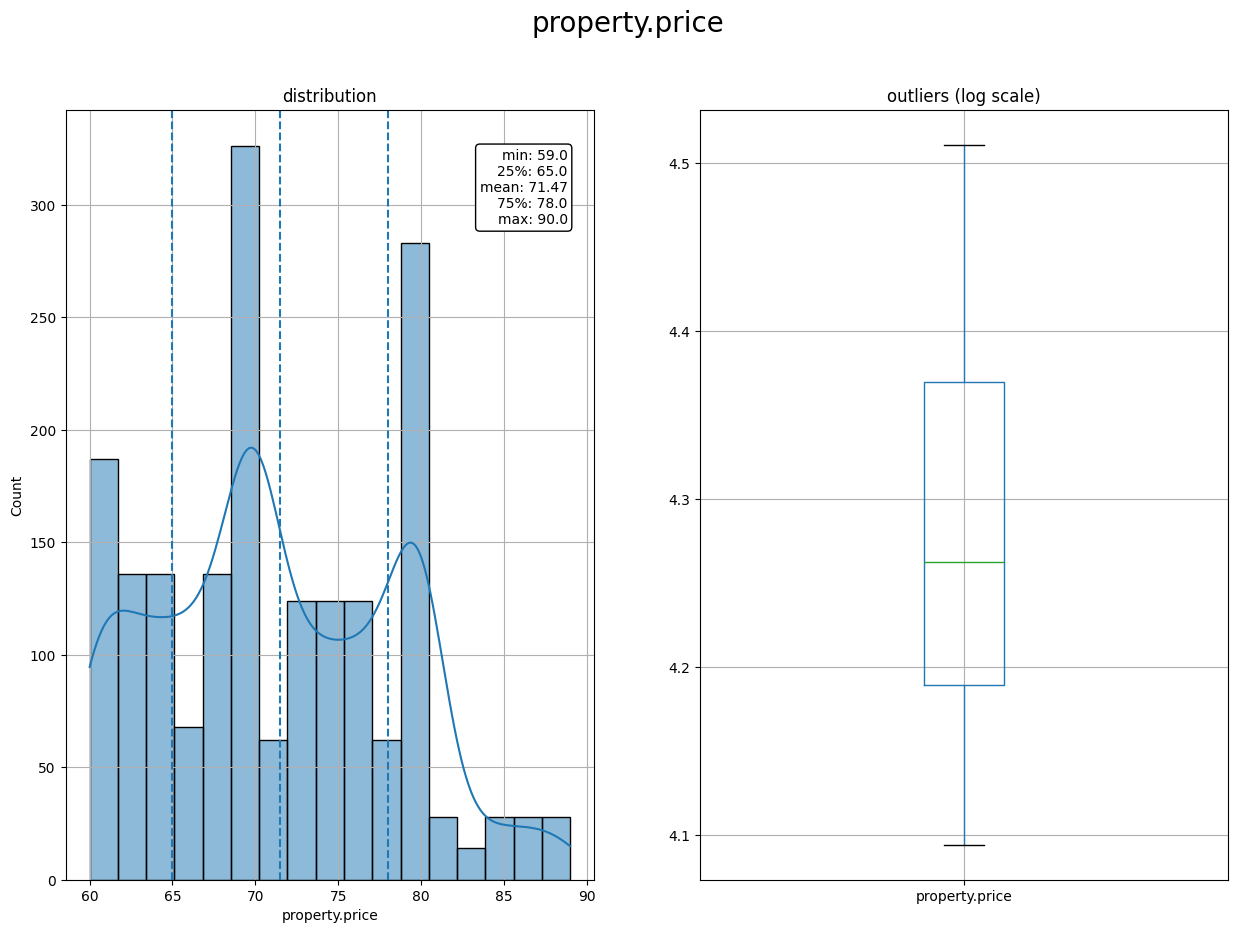

In [ ]:
# Задаем целевую переменную для анализа
x = "property.price"  # Замените на нужный столбец, например, "verification.time" или другой

# Создаем фигуру с двумя подграфиками
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
fig.suptitle(x, fontsize=20)  # Заголовок основного рисунка

# Распределение
ax[0].title.set_text('distribution')  # Название графика
variable = auction[x].fillna(auction[x].mean())  # Замена отсутствующих значений на средние
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))  # Квантили для разбиения данных
variable = variable[(variable > breaks[0]) & (variable < breaks[10])]
sns.histplot(variable, kde=True, ax=ax[0])  # Построение графика распределения с KDE

# Описание и вертикальные линии на графике для квартилей
des = auction[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)

# Текстовое описание статистики
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"], "75%: " + des["75%"], "max: " + des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

# Boxplot с логарифмическим масштабом
ax[1].title.set_text('outliers (log scale)')  # Заголовок
tmp_dtf = pd.DataFrame(auction[x])
tmp_dtf[x] = np.log(tmp_dtf[x] + 1)  # Логарифмическое преобразование (добавляем 1, чтобы избежать log(0))
tmp_dtf.boxplot(column=x, ax=ax[1])

# Отрисовка
plt.show()


In [ ]:
def show_dist(x, dtf):
    '''
    :param x: название столбца
    :param dtf: датасет
    :return: ничего не возвращает
    '''
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(x, fontsize=20)

    # График распределения
    ax[0].title.set_text('distribution')
    variable = dtf[x].fillna(dtf[x].mean())  # Замена пропущенных значений на среднее
    breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
    variable = variable[(variable > breaks[0]) & (variable < breaks[10])]
    sns.histplot(variable, kde=True, ax=ax[0])  # Гистограмма с KDE

    # Описание распределения и линии для квартилей
    des = dtf[x].describe()
    ax[0].axvline(des["25%"], ls='--')
    ax[0].axvline(des["mean"], ls='--')
    ax[0].axvline(des["75%"], ls='--')
    ax[0].grid(True)
    des = round(des, 2).apply(lambda x: str(x))
    box = '\n'.join(
        ("min: " + des["min"], "25%: " + des["25%"], "mean: " + des["mean"], "75%: " + des["75%"], "max: " + des["max"]))
    ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right",
               bbox=dict(boxstyle='round', facecolor='white', alpha=1))

    # Boxplot с логарифмическим масштабом
    ax[1].title.set_text('outliers (log scale)')
    tmp_dtf = pd.DataFrame(dtf[x])
    tmp_dtf[x] = np.log(tmp_dtf[x] + 1)  # Логарифмируем, добавив 1, чтобы избежать log(0)
    tmp_dtf.boxplot(column=x, ax=ax[1])

    # Отрисовка графиков
    plt.show()


Проверка работоспособности

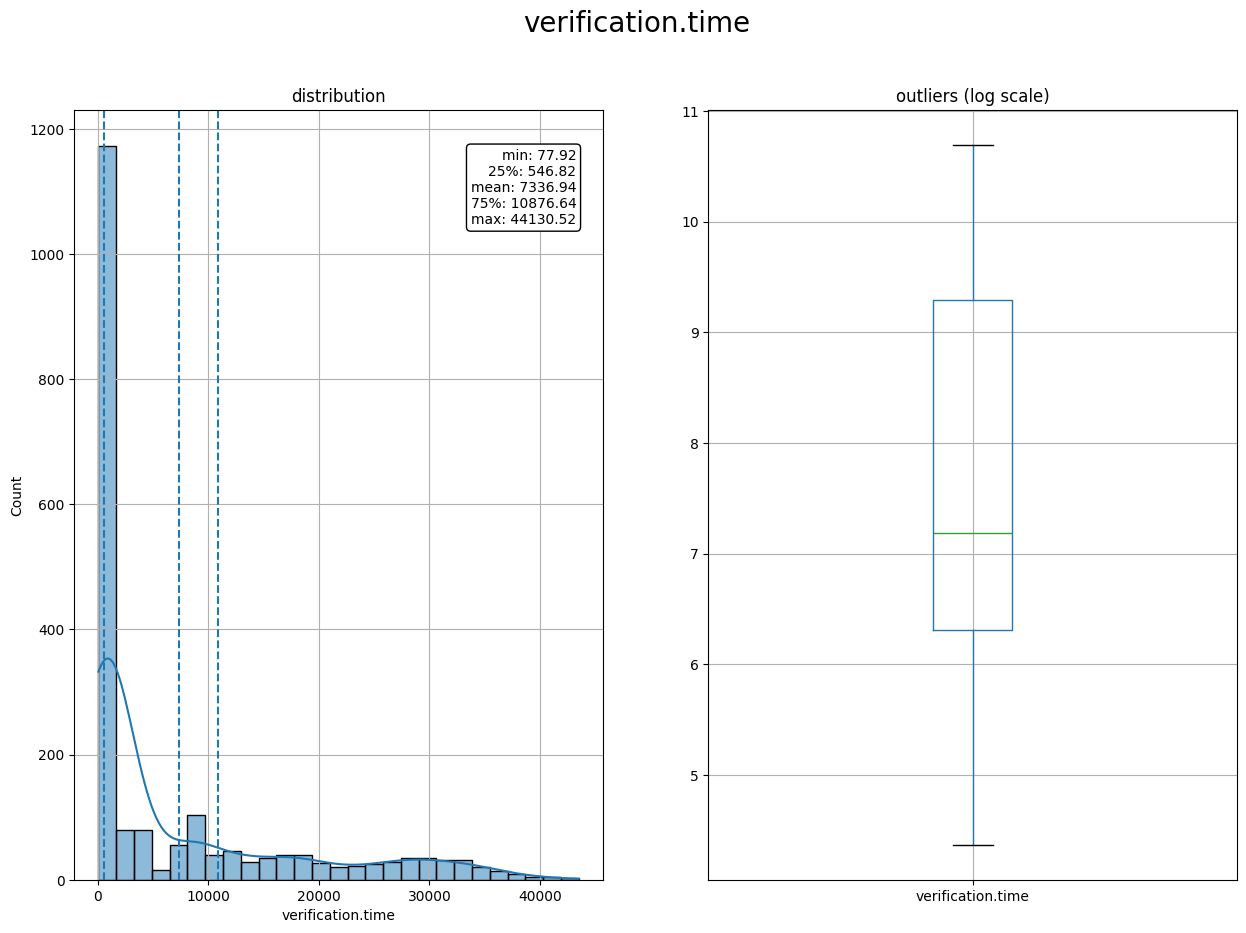

In [ ]:
show_dist("verification.time", auction)

Создание функции распределения плотности категориального столбца

In [ ]:
def plot_density_and_boxplot(cat, num, dtf):
    '''
    :param cat: название категориального столбца
    :param num: название числового столбца
    :param dtf: датасет
    :return: ничего не возвращает, но отображает графики
    '''
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(15, 10))
    fig.suptitle(f"{num} vs {cat}", fontsize=20)

    # График плотности распределения
    ax[0].title.set_text('density')
    for i in dtf[cat].unique():  # Перебираем уникальные значения в столбце cat
        sns.kdeplot(dtf[dtf[cat] == i][num], label=i, ax=ax[0])  # Построение графика плотности
    ax[0].grid(True)

    # Boxplot для выявления выбросов
    ax[1].title.set_text('outliers')
    sns.boxplot(x=cat, y=num, data=dtf, ax=ax[1])
    ax[1].grid(True)

    # Отображение графиков
    plt.show()


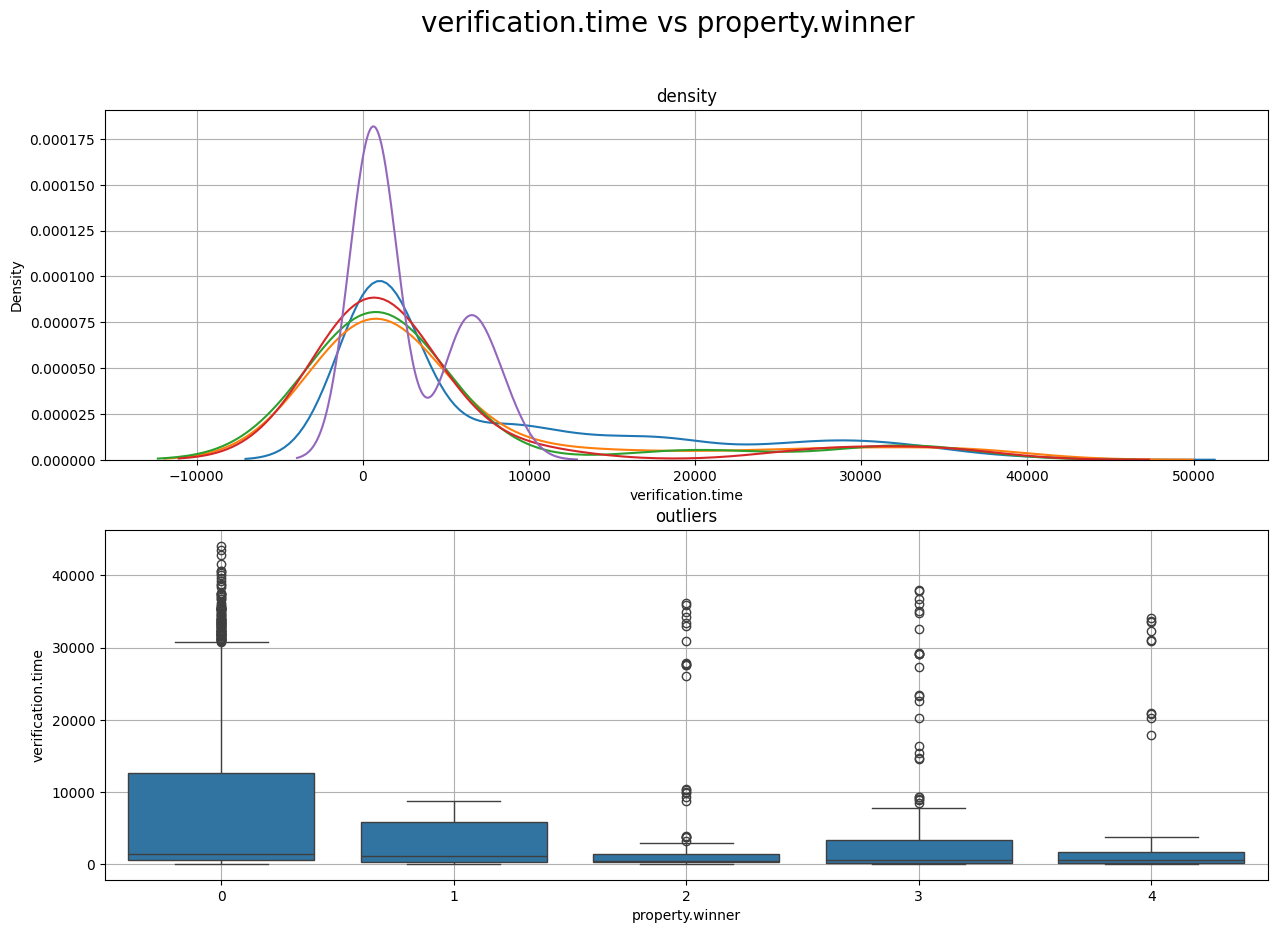

In [ ]:
plot_density_and_boxplot("property.winner", "verification.time", auction)

In [ ]:
def prep(df):
    # Создание индикаторного столбца для значений в 'property.winner', если этот столбец существует
    if 'property.winner' in df.columns:
        # Например, присваиваем значения 0 и 1, но можно добавить другие значения по аналогии
        df.loc[df['property.winner'] == 0, 'property.winner_ind'] = 0
        df.loc[df['property.winner'] == 1, 'property.winner_ind'] = 1
        # Добавьте условия, если есть больше категорий в 'property.winner'

    # Пример для других столбцов, если они есть в вашем DataFrame
    if 'species' in df.columns:
        df.loc[df.species == 'Adelie', 'species_ind'] = 0
        df.loc[df.species == 'Chinstrap', 'species_ind'] = 1
        df.loc[df.species == 'Gentoo', 'species_ind'] = 2

    if 'island' in df.columns:
        df.loc[df.island == 'Biscoe', 'island_ind'] = 0
        df.loc[df.island == 'Dream', 'island_ind'] = 1
        df.loc[df.island == 'Torgersen', 'island_ind'] = 2

    if 'sex' in df.columns:
        df.loc[df.sex == 'MALE', 'sex_g'] = 0
        df.loc[df.sex == 'FEMALE', 'sex_g'] = 1

    # Удаление ненужного столбца, если он существует
    if 'Unnamed: 0' in df.columns:
        df.drop('Unnamed: 0', axis=1, inplace=True)

    # Удаление строк с пропущенными значениями
    emdf = df.dropna(axis=0, how='any', inplace=False)

    return emdf


In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных: 70% - тренировочная выборка, 30% - тестовая выборка
dtf_tr, dtf_t = train_test_split(auction, test_size=0.3, random_state=42)

# Подготовка данных в тренировочной и тестовой выборках одинаково
dtf_train = prep(dtf_tr)
dtf_test = prep(dtf_t)

# Убедитесь, что вы используете правильное имя целевого столбца вместо 'species' и 'species_ind'
target_column = 'property.winner'  # Замените на ваш целевой столбец
indicator_column = 'property.winner_ind'  # Название индикаторного столбца, созданного функцией `prep`

# Печать информации
print("X_train shape:", dtf_train.drop(target_column, axis=1).shape, "| X_test shape:", dtf_test.drop(target_column, axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train[indicator_column]), 2), "| y_test mean:", round(np.mean(dtf_test[indicator_column]), 2))
print(dtf_train.drop(indicator_column, axis=1).shape[1], "features:", dtf_train.drop(indicator_column, axis=1).columns.to_list())


X_train shape: (1218, 9) | X_test shape: (520, 9)
y_train mean: 0.03 | y_test mean: 0.04
9 features: ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price', 'property.product', 'property.winner', 'verification.result', 'verification.time']


In [ ]:
# смотрим размер полученной выборки трейне.. 233 столбцов, 10 строк
dtf_train.shape

(1218, 10)

In [ ]:
# Формируем вспомогательный датасет для теста (все нужные фичи без целевой переменной)
# Обновленный набор признаков и целевая переменная
train_x = dtf_train[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price']]
train_y = dtf_train['property.winner_ind']

# То же для тестовой выборки
test_x = dtf_test[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity', 'property.price']]
test_y = dtf_test['property.winner_ind']



In [ ]:

# нормируем значения
Y = 'species_ind'

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))#приведем Числовые переменные (Numeric Variable) к диапазону от 0 до 1.
X = scaler.fit_transform(train_x)#преобразуем данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1.
'''
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
'''
train_x_scaled = pd.DataFrame(X, columns=train_x.columns,index=train_x.index )
train_y_scaled = train_y

train_x_scaled.head()# выводим

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price
1560,1.0,0.666667,1.0,0.0,0.290323
855,0.5,0.666667,1.0,0.0,0.096774
1047,0.5,0.666667,1.0,1.0,0.612903
1799,1.0,1.000000,1.0,0.0,0.129032
1080,0.5,0.666667,1.0,1.0,0.806452


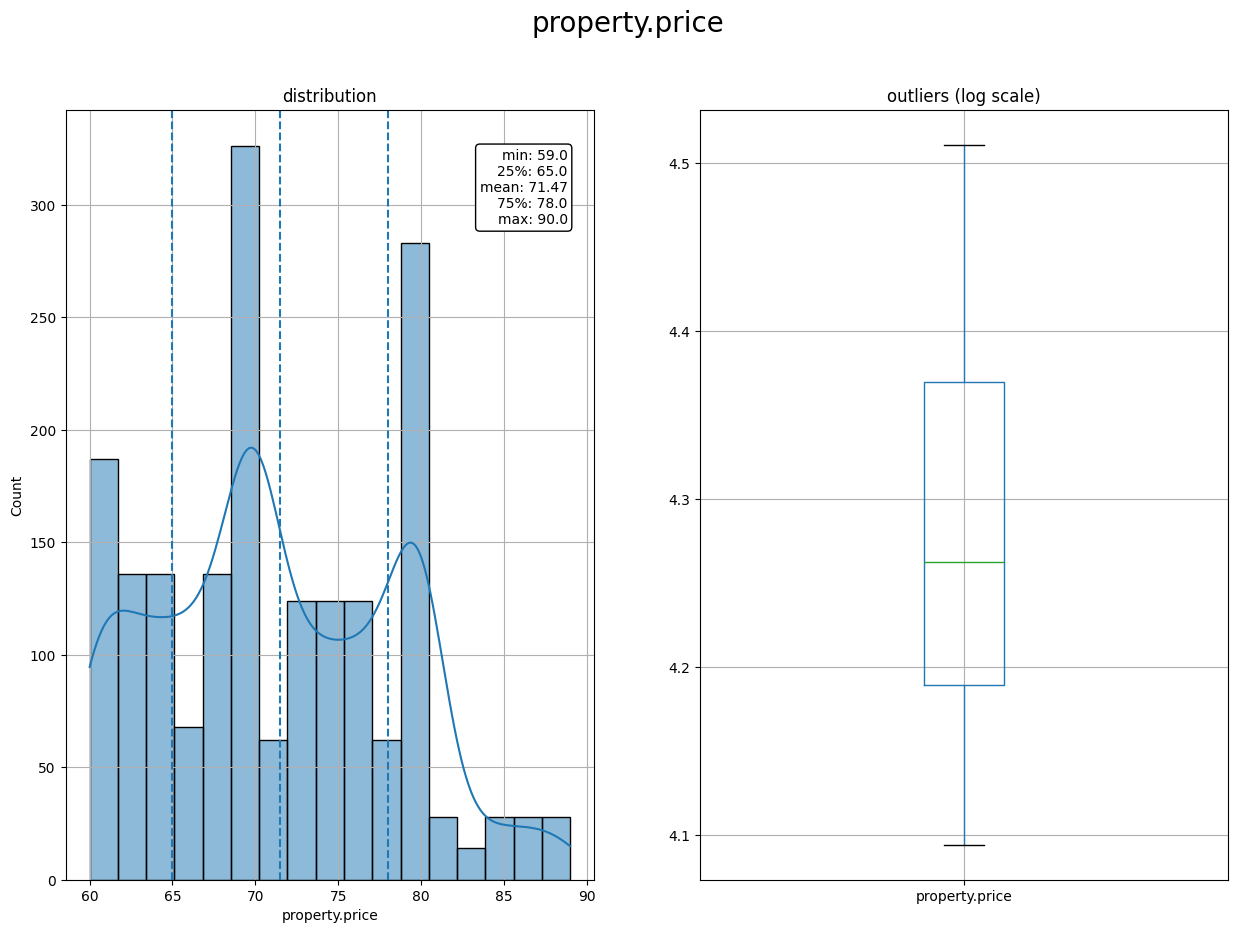

In [ ]:
# Используем функцию show_dist для существующего столбца
show_dist('property.price', auction)


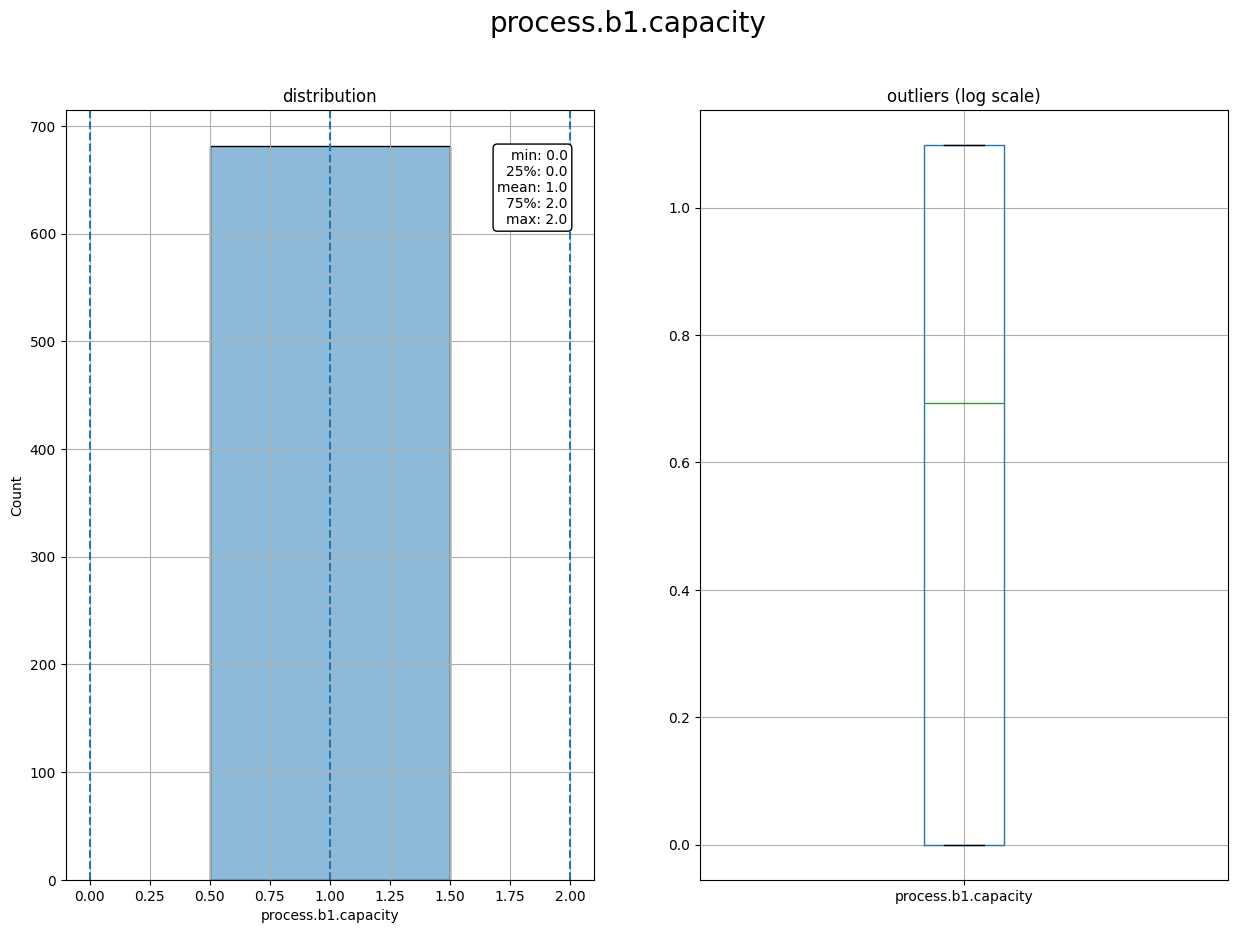

In [ ]:
show_dist('process.b1.capacity', auction)

In [ ]:
X

array([[1.        , 0.66666667, 1.        , 0.        , 0.29032258],
       [0.5       , 0.66666667, 1.        , 0.        , 0.09677419],
       [0.5       , 0.66666667, 1.        , 1.        , 0.61290323],
       ...,
       [0.5       , 0.66666667, 1.        , 0.        , 0.16129032],
       [1.        , 0.33333333, 1.        , 1.        , 0.41935484],
       [0.5       , 1.        , 1.        , 0.        , 0.19354839]])

In [ ]:
'''
смотрим какие индексы (по-сути номера объектов в основном датасете) остались в трейне
'''
train_x.index


Index([1560,  855, 1047, 1799, 1080,  861,  845, 1389,  575,  557,
       ...
        466,  121, 1638, 1044, 1724, 1130, 1294,  860, 1459, 1126],
      dtype='int64', length=1218)

In [ ]:
'''
Метод fit(data) используется для вычисления среднего значения и стандартного отклонения для данной функции, которые будут использоваться в дальнейшем для масштабирования.
Метод transform(data) используется для выполнения масштабирования с использованием среднего значения и стандартного отклонения, рассчитанного с использованием метода .fit().
Метод fit_transform() выполняет как подгонку, так и преобразование.
 X_train - это весь экземпляр с атрибутами,
 y_train - это метка каждого экземпляра.
scaled_x_train - фрейм данных с именами объектов,
scaled_x_test.values - значения, без имен объектов
 '''
X = scaler.fit_transform(test_x)

test_x_scaled = pd.DataFrame(X, columns=test_x.columns,index=test_x.index )
test_y_scaled = test_y

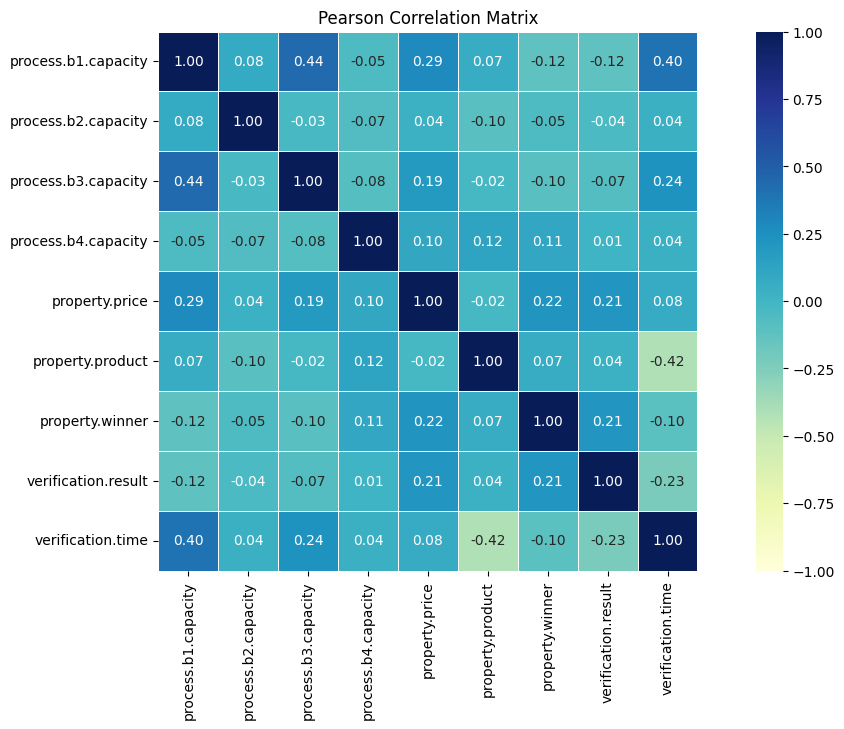

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Удаление ненужного столбца, если он существует
corr_matrix = auction.drop(columns=['Unnamed: 0'], errors='ignore').copy()

# Кодировка категориальных столбцов и вычисление корреляционной матрицы
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
        corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]

corr_matrix = corr_matrix.corr(method="pearson", numeric_only=True)

# Визуализация матрицы корреляции
plt.figure(figsize=(15, 7), dpi=100)
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu",
            cbar=True, linewidths=0.5, square=True)
plt.title("Pearson Correlation Matrix")
plt.show()


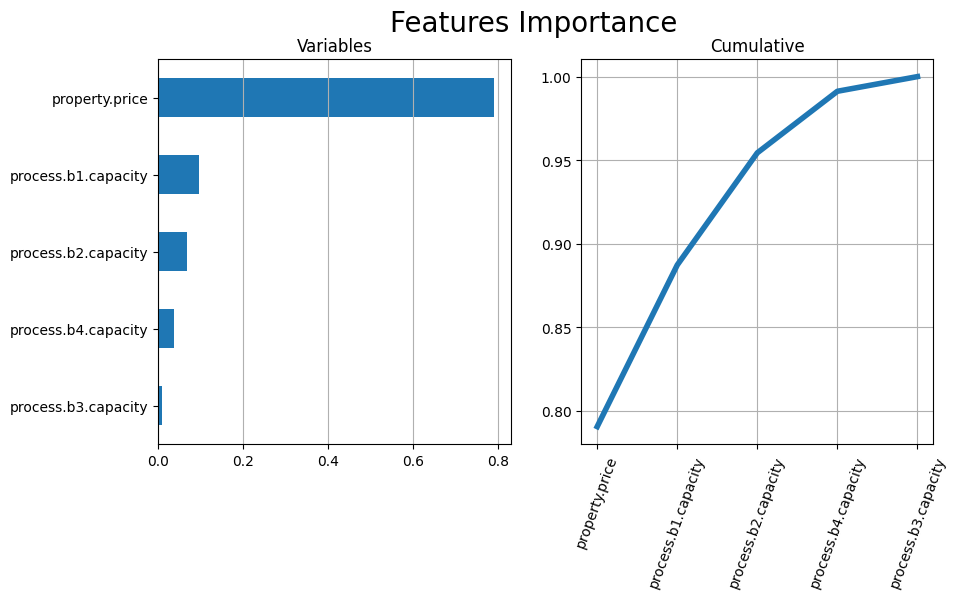

In [ ]:
from sklearn import ensemble
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Предполагаем, что train_x_scaled и train_y_scaled уже созданы и масштабированы
X = train_x_scaled.values
y = train_y_scaled.values
feature_names = train_x_scaled.columns.tolist()

# Обучаем модель RandomForestClassifier для вычисления важности признаков
model = ensemble.RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
model.fit(X, y)
importances = model.feature_importances_

# Создаем DataFrame для важности признаков
dtf_importances = pd.DataFrame({"IMPORTANCE": importances, "VARIABLE": feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum()
dtf_importances = dtf_importances.set_index("VARIABLE")

# Визуализация важности признаков
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10, 5), dpi=100)
fig.suptitle("Features Importance", fontsize=20)

# Горизонтальная гистограмма для значений важности признаков
ax[0].title.set_text('Variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0])
ax[0].grid(axis="x")
ax[0].set(ylabel="")

# Линия накопленной важности признаков
ax[1].title.set_text('Cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
ax[1].grid(axis='both')

# Отрисовка графиков
plt.show()


In [ ]:
# Подготовка данных для обучения и тестирования
X_train = train_x_scaled[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity']]
y_train = train_y_scaled

X_test = test_x_scaled[['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity']]
y_test = test_y_scaled


In [ ]:
# Инициализация модели GradientBoostingClassifier
model = ensemble.GradientBoostingClassifier()

# Определение пространства гиперпараметров для подбора
param_dic = {
    'learning_rate': [0.15, 0.1, 0.05],     # Весовой коэффициент для поправок по новым деревьям
    'n_estimators': [100, 250, 500],        # Количество деревьев в модели
    'max_depth': [2, 3, 4, 5],              # Максимальная глубина дерева
    'min_samples_split': [2, 4, 6],         # Минимальное количество выборок для разделения узла
    'min_samples_leaf': [1, 3, 5],          # Минимальное количество выборок для формирования листа
    'max_features': [2, 3, 4],              # Максимальное количество признаков для поиска при разбиении
    'subsample': [0.7, 0.8, 0.9, 1]         # Доля выборок для каждого дерева
}

# Рандомизированный поиск по гиперпараметрам
random_search = model_selection.RandomizedSearchCV(
    model,
    param_distributions=param_dic,
    n_iter=10,             # Количество итераций поиска
    scoring="accuracy",    # Метрика оценки
    random_state=0,        # Для воспроизводимости результатов
).fit(X_train, y_train)

# Вывод лучших параметров и точности
print("Best Model parameters:", random_search.best_params_)
print("Best Model mean accuracy:", random_search.best_score_)

# Обновление модели с лучшими параметрами
model = random_search.best_estimator_

Best Model parameters: {'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 2, 'learning_rate': 0.05}
Best Model mean accuracy: 0.9679821898401133


In [ ]:
# Обучение модели на тренировочном наборе
model.fit(X_train, y_train)

# Предсказание вероятностей классов для тестового набора
predicted_prob = model.predict_proba(X_test)

# Предсказание классов для тестового набора
predicted = model.predict(X_test).astype('int32')


In [ ]:
'''
смотрим, что получили
А получили мы для каждого объекта - вектор вероятностей отнесения этого объекта к классам species
'''
predicted_prob

array([[0.95819381, 0.04180619],
       [0.96583493, 0.03416507],
       [0.96583493, 0.03416507],
       ...,
       [0.96335955, 0.03664045],
       [0.94641976, 0.05358024],
       [0.94478847, 0.05521153]])

In [ ]:
# а это истинное значение, кто к какому классу относится
y_test.astype('int32') #astype -  позволяет преобразовывать тип данных существующего столбца данных в набор данны

,property.winner_ind
1316,0
1000,0
1068,0
1970,0
529,0
...,...
405,0
752,0
1206,0
1734,0


In [ ]:
# Оценка метрик для двоичной классификации
try:
    # Используем вероятности только для положительного класса
    auc = metrics.roc_auc_score(y_test, predicted_prob[:, 1])  # Вероятности для класса 1

    # Вычисляем остальные метрики
    accuracy = metrics.accuracy_score(y_test, predicted)
    recall = metrics.recall_score(y_test, predicted, average="binary")
    precision = metrics.precision_score(y_test, predicted, average="binary")

    # Вывод метрик
    print("Accuracy (overall correct predictions):", round(accuracy, 2))
    print("AUC:", round(auc, 2))
    print("Recall (all 1s predicted right):", round(recall, 2))
    print("Precision (confidence when predicting a 1):", round(precision, 2))

    # Вывод детализированного отчета
    print("Detail:")
    print(metrics.classification_report(y_test, predicted))
except ValueError as e:
    print(f"Error in metric calculation: {e}")


Accuracy (overall correct predictions): 0.96
AUC: 0.56
Recall (all 1s predicted right): 0.0
Precision (confidence when predicting a 1): 0.0
Detail:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       501
         1.0       0.00      0.00      0.00        19

    accuracy                           0.96       520
   macro avg       0.48      0.50      0.49       520
weighted avg       0.93      0.96      0.95       520



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

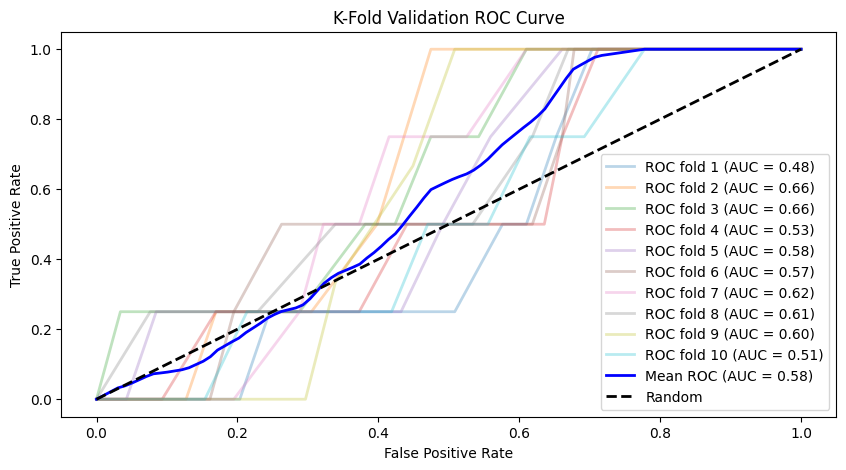

In [ ]:
# StratifiedKFold для кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)  # Средние значения False Positive Rate
fig = plt.figure(figsize=(10, 5), dpi=100)
i = 1

# Кросс-валидация
for train_index, test_index in cv.split(X_train, y_train):
    # Деление на тренировочные и тестовые данные в рамках Fold
    X_train_selected = X_train.iloc[train_index]
    y_train_selected = y_train.iloc[train_index]
    X_test_selected = X_train.iloc[test_index]
    y_test_selected = y_train.iloc[test_index]

    # Обучение модели на тренировочных данных
    model.fit(X_train_selected, y_train_selected)
    prediction = model.predict_proba(X_test_selected)  # Вероятности для тестовых данных

    # ROC кривая
    fpr, tpr, thresholds = metrics.roc_curve(y_test_selected, prediction[:, 1], pos_label=1)
    tprs.append(np.interp(mean_fpr, fpr, tpr))  # Интерполяция для выравнивания
    tprs[-1][0] = 0.0  # Начальная точка TPR

    # Площадь под ROC-кривой (AUC)
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)

    # Построение ROC для текущего Fold
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label=f'ROC fold {i} (AUC = {roc_auc:.2f})')
    i += 1

# Усредненная ROC-кривая
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0  # Последняя точка TPR
mean_auc = metrics.auc(mean_fpr, mean_tpr)

# Построение средней ROC-кривой
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2, alpha=1)

# Диагональ случайного угадывания
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random')

# Оформление графика
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Fold Validation ROC Curve')
plt.legend(loc="lower right")
plt.show()


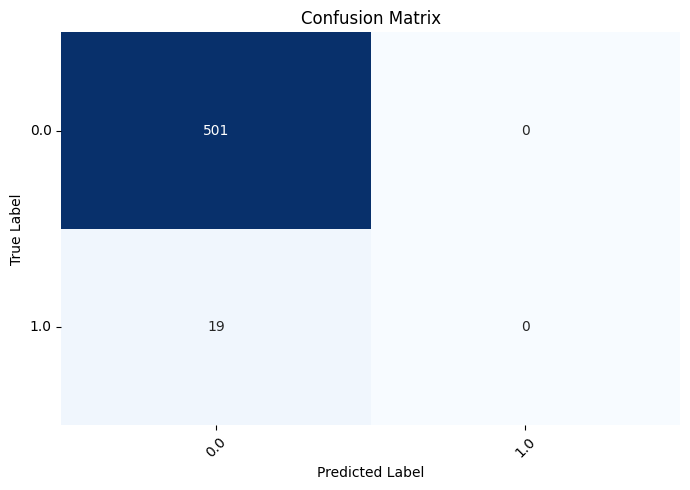

In [ ]:
# Определяем уникальные классы
classes = np.unique(y_test)  # Уникальные классы в целевой переменной

# Создаём матрицу путаницы
cm = metrics.confusion_matrix(y_test, predicted, labels=classes)

# Визуализация с использованием Seaborn
fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False,
            xticklabels=classes, yticklabels=classes)

# Оформление графика
ax.set(xlabel="Predicted Label", ylabel="True Label", title="Confusion Matrix")
ax.set_yticklabels(labels=classes, rotation=0)  # Поворачиваем метки оси Y для читаемости
ax.set_xticklabels(labels=classes, rotation=45)  # Поворачиваем метки оси X для читаемости

# Отображение графика
plt.tight_layout()
plt.show()


In [ ]:
def compute_class(ls_res, class_value):
    """
    Преобразует метки классов в бинарные значения для указанного класса.

    Parameters:
    - ls_res: array-like, метки классов (numpy array, pandas Series, или список).
    - class_value: int или str, значение класса, которое нужно выделить.

    Returns:
    - array-like, метки классов с бинарным значением (1 для class_value, 0 для остальных).
    """
    if isinstance(ls_res, pd.Series) or isinstance(ls_res, pd.DataFrame):
        return ls_res.apply(lambda c: 1 if c == class_value else 0).astype(int)
    else:  # Если это массив NumPy или список
        return np.array([1 if c == class_value else 0 for c in ls_res])


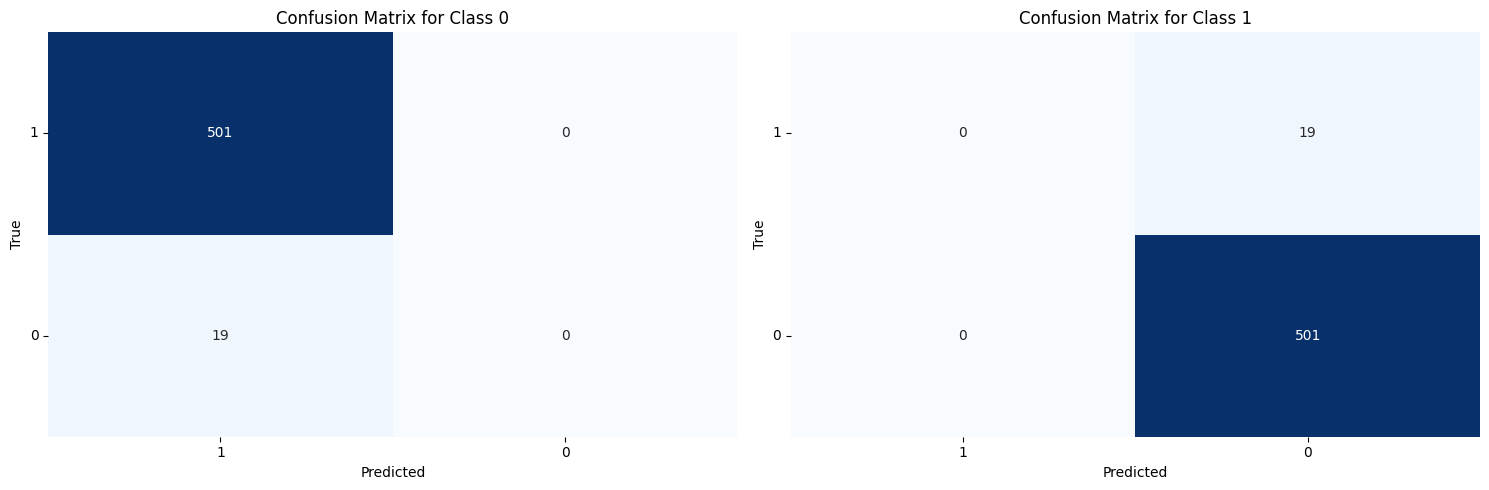

In [ ]:
# Уникальные классы
classes = np.unique(y_test).astype(int)  # Предполагается, что классы представлены числами
lbs = [1, 0]  # Метки для бинарной матрицы путаницы

# Создание подграфиков для каждого класса
fig, axes = plt.subplots(nrows=1, ncols=len(classes), figsize=(15, 5), dpi=100)

# Обработка каждого класса
for idx, class_i in enumerate(classes):
    # Бинаризация меток
    y_one_class = compute_class(y_test, class_i)
    predicted_one_class = compute_class(pd.Series(predicted.tolist()), class_i)  # Преобразование предсказаний

    # Вычисление матрицы путаницы
    cm = metrics.confusion_matrix(y_one_class, predicted_one_class, labels=lbs)

    # Визуализация матрицы путаницы
    sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues, cbar=False, ax=axes[idx])
    axes[idx].set(xlabel="Predicted", ylabel="True", title=f"Confusion Matrix for Class {class_i}")
    axes[idx].set_xticklabels(labels=lbs, rotation=0)
    axes[idx].set_yticklabels(labels=lbs, rotation=0)

# Оформление и вывод
plt.tight_layout()
plt.show()


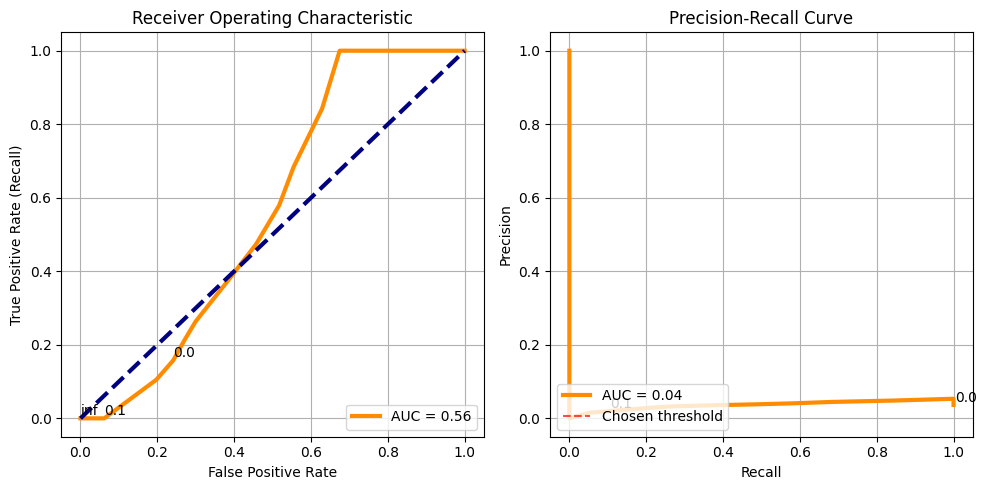

In [ ]:
# Уникальные классы в y_test
classes = np.unique(y_test)

# Создание подграфиков для ROC и Precision-Recall кривых
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=100)

# ROC-кривая
fpr, tpr, thresholds_roc = metrics.roc_curve(y_test, predicted_prob[:, 1], pos_label=1)
roc_auc = metrics.auc(fpr, tpr)

# Построение ROC-кривой
ax[0].plot(fpr, tpr, color='darkorange', lw=3, label='AUC = %0.2f' % roc_auc)
ax[0].plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
ax[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate (Recall)',
          title='Receiver Operating Characteristic')
ax[0].legend(loc="lower right")
ax[0].grid(True)

# Аннотация порогов для ROC
thres_in_plot = []
for i, t in enumerate(thresholds_roc):
    t = np.round(t, 1)
    if t not in thres_in_plot:
        ax[0].annotate(t, xy=(fpr[i], tpr[i]), xytext=(fpr[i], tpr[i]),
                       textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)

# Precision-Recall кривая
precisions, recalls, thresholds_pr = metrics.precision_recall_curve(y_test, predicted_prob[:, 1], pos_label=1)
pr_auc = metrics.auc(recalls, precisions)

# Построение P-R кривой
ax[1].plot(recalls, precisions, color='darkorange', lw=3, label='AUC = %0.2f' % pr_auc)
ax[1].hlines(y=precision, xmin=0, xmax=recall, color='red', linestyle='--', alpha=0.7, label="Chosen threshold")
ax[1].vlines(x=recall, ymin=0, ymax=precision, color='red', linestyle='--', alpha=0.7)
ax[1].set(xlabel='Recall', ylabel='Precision', title='Precision-Recall Curve')
ax[1].legend(loc="lower left")
ax[1].grid(True)

# Аннотация порогов для P-R
thres_in_plot = []
for i, t in enumerate(thresholds_pr):
    t = np.round(t, 1)
    if t not in thres_in_plot:
        ax[1].annotate(t, xy=(recalls[i], precisions[i]),
                       xytext=(recalls[i], precisions[i]),
                       textcoords='offset points', ha='left', va='bottom')
        thres_in_plot.append(t)

# Вывод графиков
plt.tight_layout()
plt.show()


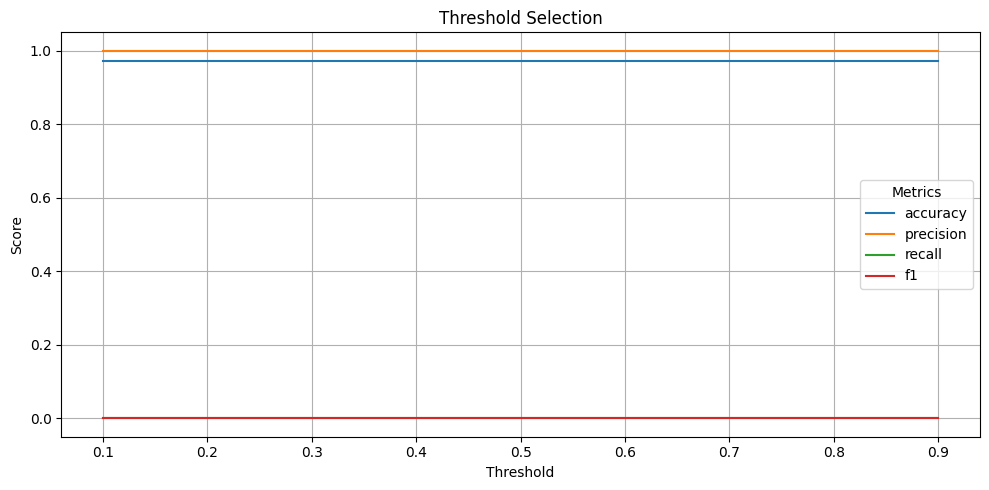

In [ ]:
# Определение графика
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=100)

# Словарь для хранения метрик
dic_scores = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

# Разделение данных на тренировочную и тестовую выборки
XX_train, XX_test, yy_train, yy_test = model_selection.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Предсказание вероятностей
predicted_prob = model.fit(XX_train, yy_train).predict_proba(XX_test)[:, 1]

# Список порогов
thresholds = np.arange(0.1, 1, step=0.1)

# Расчёт метрик для каждого порога
for threshold in thresholds:
    predicted = (predicted_prob > threshold).astype(int)  # Бинаризация на основе порога
    dic_scores["accuracy"].append(metrics.accuracy_score(yy_test, predicted))
    dic_scores["precision"].append(metrics.precision_score(yy_test, predicted, average='binary', zero_division=1))
    dic_scores["recall"].append(metrics.recall_score(yy_test, predicted, average='binary'))
    dic_scores["f1"].append(metrics.f1_score(yy_test, predicted, average='binary'))

# Построение графиков для метрик
dtf_scores = pd.DataFrame(dic_scores, index=thresholds)  # Преобразуем в DataFrame
ax.set(xlabel='Threshold', ylabel="Score", title="Threshold Selection")
dtf_scores.plot(ax=ax)

# Оформление графика
ax.legend(title="Metrics")
plt.grid(True)
plt.tight_layout()
plt.show()
